In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
#visualize the data

[2]


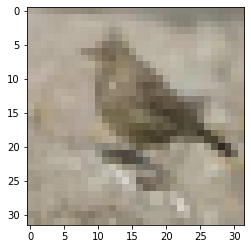

In [5]:
i = 120
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\saura\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


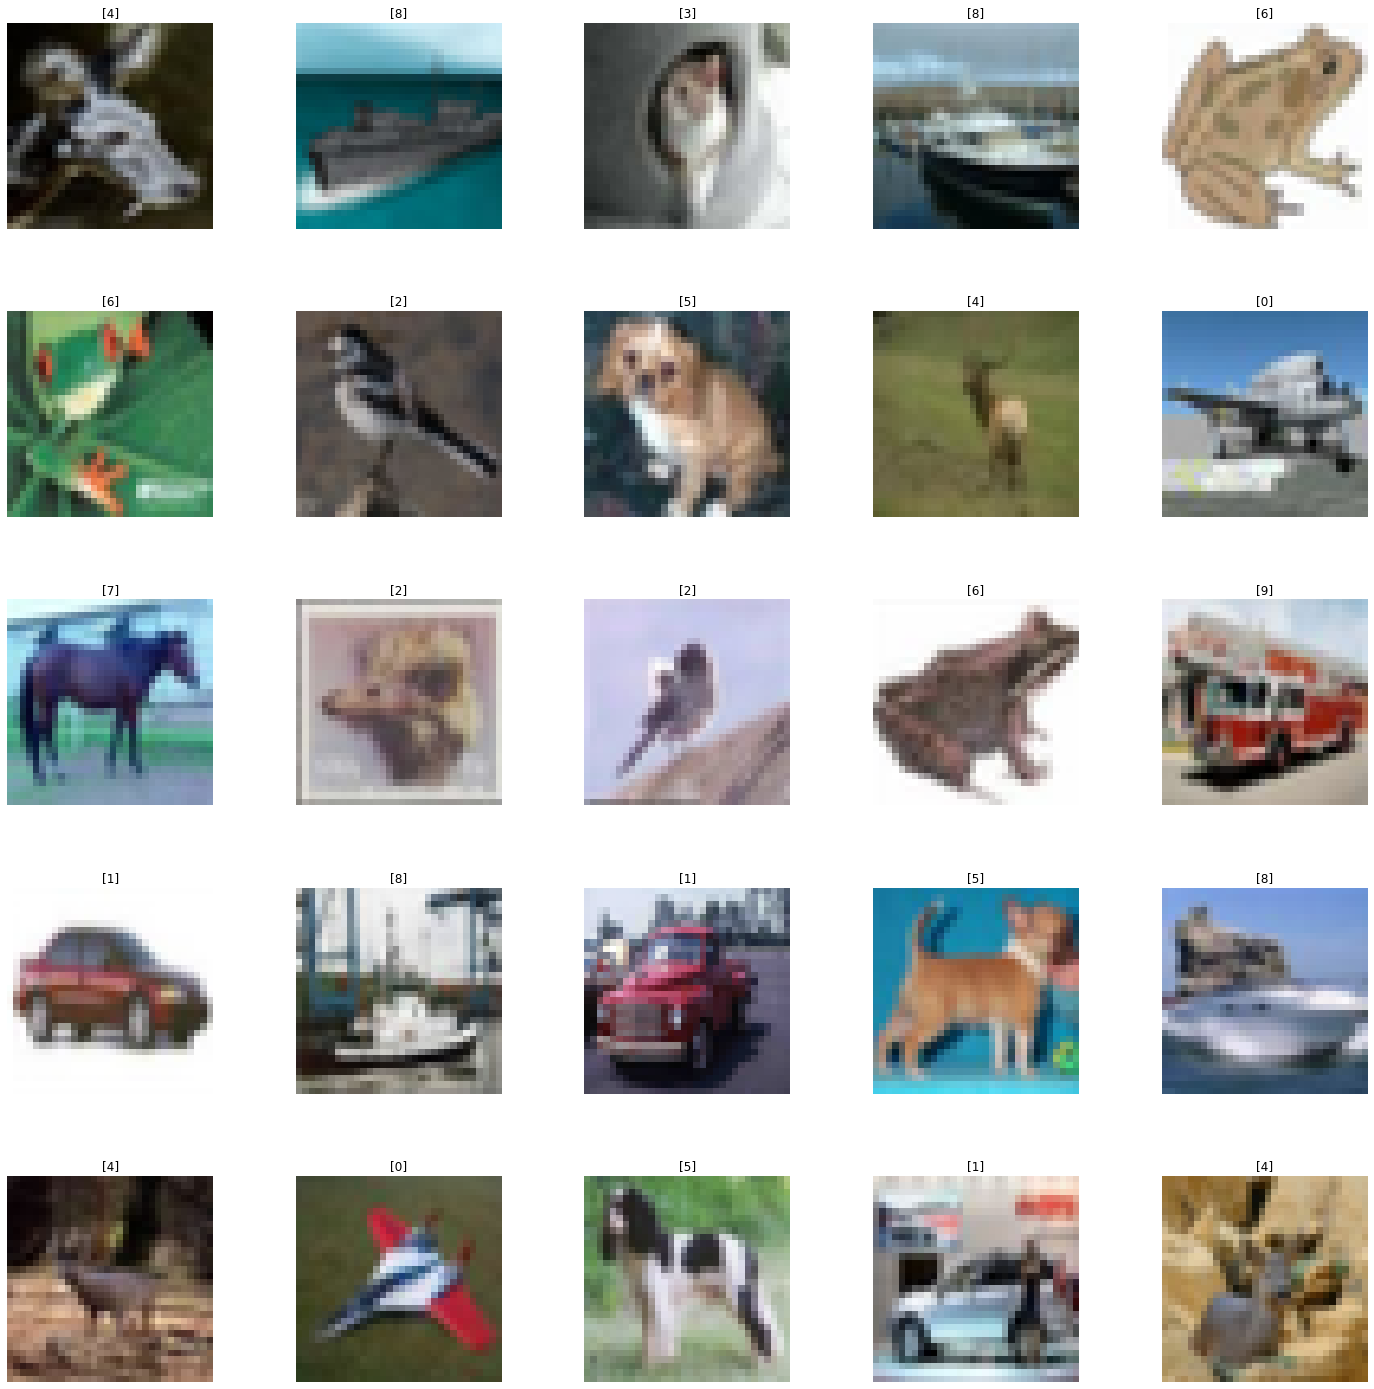

In [6]:
W = 5
L = 5
fig, axes = plt.subplots(L, W, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L*W):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])
plt.subplots_adjust(hspace = 0.4)

In [7]:
#Data Preparation

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
number_cat = 10

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
##Sparse representation
import keras
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, number_cat)
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
##Normalization
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [17]:
#Train the model

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
#Output Layer
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [19]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics=['accuracy'])

In [1]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs = 2, shuffle=True)

NameError: name 'cnn_model' is not defined

In [ ]:
#Evaluate the model

In [20]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 17s 16ms/step - loss: 2.3044 - accuracy: 0.1066
Test accuracy: 0.1054999977350235


In [21]:
predicted_classes = cnn_model.predict_classes(X_test)

C:\Users\saura\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)

In [23]:
predicted_classes

array([3, 3, 2, ..., 2, 2, 2], dtype=int64)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [25]:
y_test = y_test.argmax(1)

In [26]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

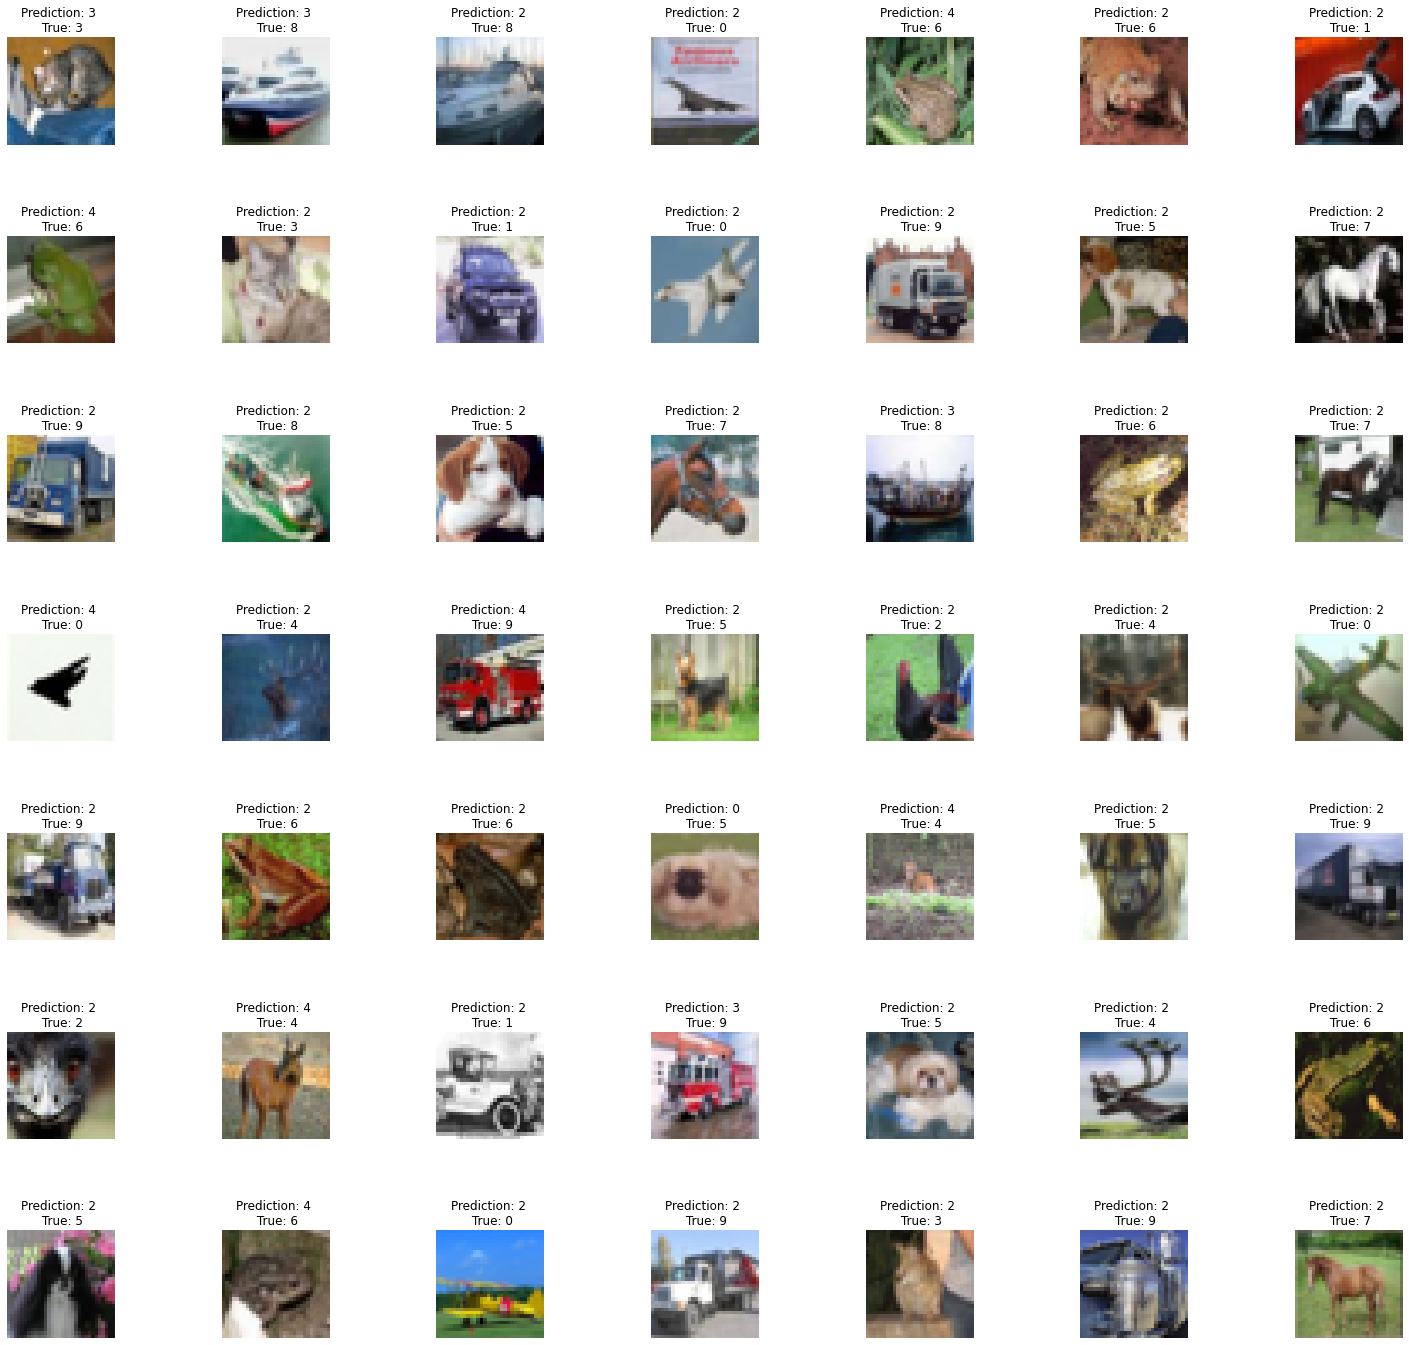

In [27]:
L_t = 7
W_t = 7
fig, axes = plt.subplots(L_t, W_t, figsize = (25,25))
axes = axes.ravel()


for i in np.arange(0, L_t*W_t):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction: {} \n True: {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)

In [29]:
cm

array([[ 20,   1, 674, 129, 167,   0,   0,   0,   3,   6],
       [ 10,   4, 775, 129,  72,   0,   1,   0,   9,   0],
       [ 43,   4, 612,  69, 263,   0,   2,   0,   5,   2],
       [ 30,   4, 600,  73, 274,   0,   4,   0,  13,   2],
       [ 38,   0, 573,  42, 339,   0,   5,   0,   1,   2],
       [ 27,   1, 661,  57, 238,   0,   3,   0,  12,   1],
       [ 27,   1, 633,  25, 301,   0,   4,   0,   8,   1],
       [ 31,   1, 647,  80, 218,   0,   3,   0,  15,   5],
       [ 16,   1, 740, 131, 109,   0,   1,   0,   0,   2],
       [ 19,   1, 687, 192,  93,   0,   0,   0,   5,   3]], dtype=int64)

<AxesSubplot:>

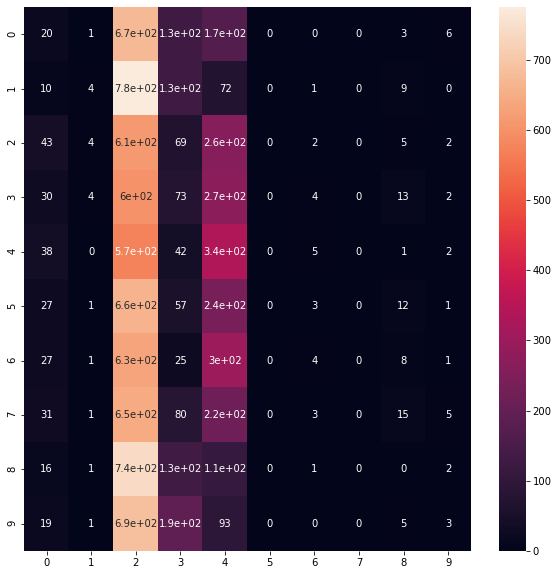

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)